Scores : [Kaggle note Book for XGBoost hyperparameters](https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost/notebook)

In [4]:
pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

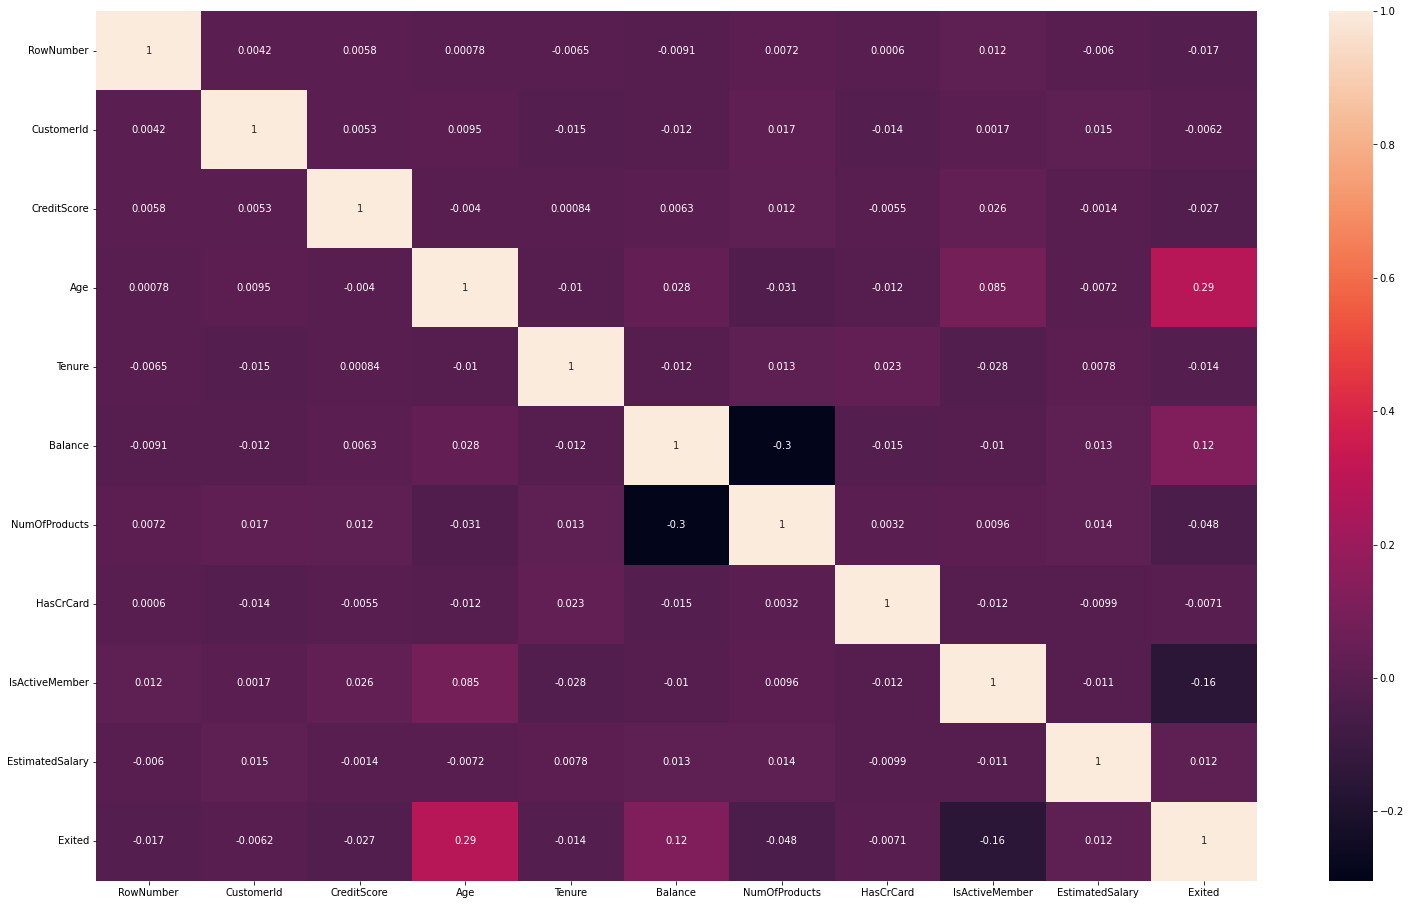

In [9]:
plt.figure(figsize=(26,16))
sns.heatmap(df.corr(), annot=True)

In [10]:
## we don't need first three columns so let's drop and split our data into train test split data
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [11]:
[x for x in x.columns if df[x].dtype == "O"]

['Geography', 'Gender']

In [12]:
dummies1 = pd.get_dummies(x['Geography'], drop_first=True)
dummies2 = pd.get_dummies(x['Gender'], drop_first = True)

In [13]:
dummies2

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [14]:
x=x.drop(['Geography','Gender'],axis=1)

In [15]:
X = pd.concat([x,dummies1,dummies2,], axis = 1)


In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
import xgboost
model = xgboost.XGBClassifier()

### In case of random search cv, we need to provide the scoring parameter 
We have five parameters, if we use grid search cv, the total number of models will be 5 * 8 * 4 * 5 * 4 = 3200 so that's why we use random search cv.
As we are using cross validation with cv = 5, so the total will be 3200 * 5.

In [25]:
classifer = RandomizedSearchCV(model, param_distributions=params, n_iter=5, scoring='roc_auc', cv = 5, n_jobs=-1, verbose = 3)

In [41]:
5*8*4*5*4

3200

In [26]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [29]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
classifer.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 26.57 seconds.


In [30]:
classifer.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [32]:
classifer.best_params_

{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [34]:
Model1 = xgboost.XGBRFClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None,)

In [38]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Model1,X,y,cv=10)

In [39]:
score

array([0.854, 0.846, 0.859, 0.842, 0.853, 0.84 , 0.852, 0.863, 0.849,
       0.846])

In [40]:
score.mean()

0.8503999999999999